# Check data structure

[a for a in AS_model] : ['fundamental_activities', 'necessary_activities', 'random_activities', 'walking_activities', 'fundamental_activity_order', 'sleep']
SD_model[0] : <Sensor>normal PIR(#0)(150.00, 150.00)
Memory size of SD: 20.33 MB
[a for a in AL_model] : ['housebound_go_out_num', 'housebound_go_out_duration', 'housebound_use_the_phone_num', 'housebound_use_the_phone_duration', 'semi_bedridden_nap_duration', 'semi_bedridden_rest_duration', 'semi_bedridden_go_out_num', 'semi_bedridden_go_out_duration', 'wandering_num', 'wandering_minute', 'fall_w_parameters', 'fall_s_parameters', 'forgetting_num']
WT[0]: <WalkingTrajectory> type: Direct from Bed (4:44:51.441763) to Sofa (4:44:55.441763)
WT[0].centers : [(-17.5, 52.5), (37.5, 47.5), (92.5, 42.5), (147.5, 37.5), (202.5, 32.5), (252.5, 12.5)]
len(WT[0].centers) : 6
WT[0].timestamp : [datetime.timedelta(seconds=17091, microseconds=441763), datetime.timedelta(seconds=17092, microseconds=241763), datetime.timedelta(seconds=17093, micros

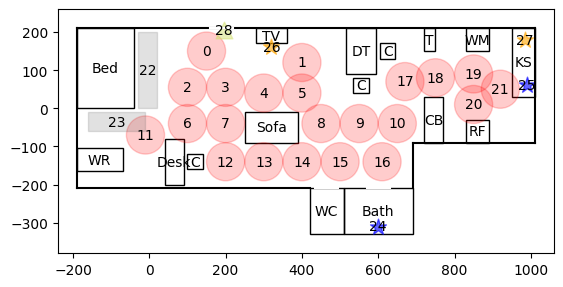

In [8]:
from pathlib import Path
from src import floor_plan
import src.utils as utils
import src.analysis as analysis
import src.constants as constants

layout_path = Path("./layout_data/test_layout")
data_path = layout_path / Path("test_data_4")

# layout_path = Path("./layout_data/2024_01_25_20_51_49")
# data_path = layout_path / Path("2024_01_25_20_54_05")

# Load data
# FP: Floor plan
# AS_model: Activity sequence model
# WT_model: Walking trajectory model
# SD_model: Sensor data model
# AL_model: Anomaly label model
# AS: Activity sequence
# WT: Walking trajectories
# SD: Sensor data
# AL: Anomaly labels
FP = floor_plan.FloorPlan()
FP.load_layout(layout_path)
AS_model = utils.pickle_load(data_path, constants.ACTIVITY_MODEL)
WT_model = utils.pickle_load(data_path, constants.WALKING_MODEL)
SD_model = utils.pickle_load(data_path, constants.SENSOR_MODEL)
AL_model = utils.pickle_load(data_path, constants.ANOMALY_MODEL)
AS = utils.pickle_load(data_path, constants.ACTIVITY_SEQUENCE)
WT = utils.pickle_load(data_path, constants.WALKING_TRAJECTORY)
SD = utils.pickle_load(data_path, constants.SENSOR_DATA)
AL = utils.pickle_load(data_path, constants.ANOMALY)

# check each data

# FP: Floor plan

# AS_model: Activity sequence model
print(f"[a for a in AS_model] : {[a for a in AS_model]}")

# WT_model: Walking trajectory model

# SD_model: Sensor data model
print(f"SD_model[0] : {SD_model[0]}")
print(f"Memory size of SD: {analysis.memory_size(SD)}")

# AL_model: Anomaly label model
print(f"[a for a in AL_model] : {[a for a in AL_model]}")

# AS: Activity sequence

# WT: Walking trajectories
print(f"WT[0]: {WT[0]}")
print(f"WT[0].centers : {WT[0].centers}")
print(f"len(WT[0].centers) : {len(WT[0].centers)}")
print(f"WT[0].timestamp : {WT[0].timestamp}")
print(f"WT[0].left_steps : {WT[0].left_steps}")
print(f"WT[0].right_steps : {WT[0].right_steps}")

# SD: Sensor data
print(f"SD[0] : {SD[0]}")

# AL: Anomaly lables
print(f"AL.keys() : {AL.keys()}")
AL_periods = analysis.make_AL_periods(data_path) # extract periods of anomalies
print(f"AL_periods.keys(): {AL_periods.keys()}")

utils.save_layout(data_path / "experiment", layout_path, sensors=SD_model,WT=[],
    show=True, color_map_name="Blues", filename="sensor_arangement",dpi=400,mark_point=[])

In [6]:
# fall
fall_count = 0
fall_number = 4
for i, wt in enumerate(WT):
    if wt.fall_w:
        fall_w_points = wt.centers[wt.fall_w_index]
        fall_time = wt.timestamp[0]
        fall_count += 1
        if fall_count == fall_number:
            break

print(fall_time)
print(fall_w_points)

298 days, 5:58:56.153367
(617.5, -42.5)


In [21]:
# wandering
wandering_count = 0
wandering_number = 3
for i, act in enumerate(AS):
    if act.activity.name == "wandering":
        wandering_time = act.start
        wandering_count += 1
        if wandering_count == wandering_number:
            break

print(wandering_time)

78 days, 18:02:33.176478


# Floor plan

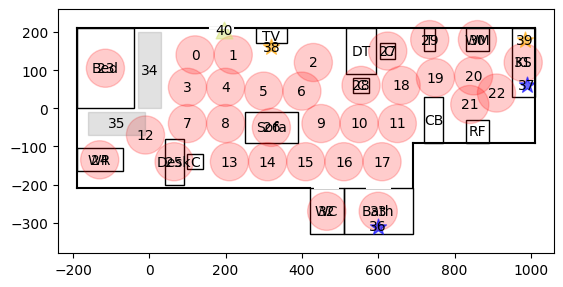

In [1]:
from pathlib import Path
from src import utils
from src import sensor_model

layout_path = Path("./layout_data/test_layout")
sensors = sensor_model.test_sensors2
utils.save_layout(layout_path, layout_path, sensors=sensors,WT=[],
    show=True, color_map_name="Blues", filename="test_sensor_arangement",dpi=400,mark_point=[])